<a href="https://colab.research.google.com/github/sanjanarc/Recipes_db/blob/main/DB_preprocessing_recipes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Initial preprocessing Recipes

In [76]:
import csv
import pandas as pd
import numpy as np


with open("recipes_test2.csv", 'r') as input_file:
    csvreader = csv.reader(input_file, delimiter=';')

    prev_row = []
    curr_row = []
    modified_rows = []
    header_row = next(csvreader)
    modified_rows.append(header_row)


    for row in csvreader:
        curr_row = row
        if curr_row[0].split(";")[0].isnumeric():
            if prev_row:
                if len(prev_row) > 0:
                    modified_row = prev_row[:]
                    modified_rows.append(modified_row)

            prev_row = curr_row
        else:
            if len(prev_row) > 0:
                prev_row[:][-1] += ' ' + ' '.join(curr_row)  # Add trailing data


Initial Dataframe

In [77]:
header = modified_rows[0]
df = pd.DataFrame(modified_rows[1:],columns=header)

num_rows = len(df)
num_rows

11957

In [78]:
df  #pre clean up

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,,,,,,,,,,
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,,,,,,,,,,
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,,,,,,,,,,
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,,,,,,,,,,
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,,,,,,,,,,
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11952,15169,Little Applesauce Muffins,14817,KimS6654,PT15M,PT15M,PT30M,2001-12-04T13:07:00Z,Make and share this Little Applesauce Muffins ...,character(0),...,,,,,,,,,,
11953,15170,Blueberry Lemon Bread,21705,mysticalmagical,PT1H,PT30M,PT1H30M,2001-12-04T13:07:00Z,Make and share this Blueberry Lemon Bread reci...,character(0),...,,,,,,,,,,
11954,15171,Noodles Ratatouille,6164,Mini Ravindran,PT10M,PT10M,PT20M,2001-12-04T13:07:00Z,Make and share this Noodles Ratatouille recipe...,character(0),...,,,,,,,,,,
11955,15172,Vegetarian Teething Cookies,21399,Karen From Colorado,PT10M,PT20M,PT30M,2001-12-04T13:07:00Z,Make and share this Vegetarian Teething Cookie...,character(0),...,,,,,,,,,,


###Clean up

In [79]:
null_columns = [col for col in df.columns if col == '']

df = df.drop(columns=null_columns)
df.columns
delete_columns = ['Images','TotalTime','DatePublished','SaturatedFatContent','CholesterolContent','CarbohydrateContent','FiberContent','RecipeServings','RecipeYield','AggregatedRating','ReviewCount']

df = df.drop(columns=delete_columns)

df.rename(columns={'Name': 'RecipeName'}, inplace=True)
df.rename(columns={'Description': 'RecipeDescription'}, inplace=True)
df.rename(columns={'RecipeIngredientParts': 'Ingredients'}, inplace=True)
df.rename(columns={'AggregatedRating': 'OverallRating'}, inplace=True)
df.rename(columns={'RecipeCategory': 'CategoryName'}, inplace=True)




In [80]:
df.columns

Index(['RecipeId', 'RecipeName', 'AuthorId', 'AuthorName', 'CookTime',
       'PrepTime', 'RecipeDescription', 'CategoryName', 'Keywords',
       'RecipeIngredientQuantities', 'Ingredients', 'Calories', 'FatContent',
       'SodiumContent', 'SugarContent', 'ProteinContent',
       'RecipeInstructions'],
      dtype='object')

In [81]:
df = df.drop(0)
df #post clean up

,RecipeId,RecipeName,AuthorId,AuthorName,CookTime,PrepTime,RecipeDescription,CategoryName,Keywords,RecipeIngredientQuantities,Ingredients,Calories,FatContent,SodiumContent,SugarContent,ProteinContent,RecipeInstructions
1,39,Biryani,1567,elly9812,PT25M,PT4H,Make and share this Biryani recipe from Food.com.,Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...","c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,368.4,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,This is from one of my first Good House Keepi...,Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,1.8,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,This dish is best prepared a day in advance to...,Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24,1558.6,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,Make and share this Cabbage Soup recipe from F...,Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""46"", ""4"", ""1"", ""2"", ""1"")","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,959.3,17.7,4.3,"c(""Mix everything together and bring to a boil..."
5,43,Best Blackbottom Pie,34879,Barefoot Beachcomber,PT2H,PT20M,Make and share this Best Blackbottom Pie recip...,Pie,"c(""Dessert"", ""Weeknight"", ""Stove Top"", ""< 4 Ho...","c(""1 1/4"", ""1/4"", ""6"", ""1/3"", ""1/4"", ""1/4"", ""2...","c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",437.9,19.3,267.6,42.5,7,"c(""Graham Cracker Crust: In small bowl, combin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11952,15169,Little Applesauce Muffins,14817,KimS6654,PT15M,PT15M,Make and share this Little Applesauce Muffins ...,Quick Breads,"c(""Breads"", ""Kid Friendly"", ""< 30 Mins"", ""For ...","c(""1/2"", ""1/2"", ""2"", ""3/4"", ""1 3/4"", ""1"", ""1/2...","c(""butter"", ""margarine"", ""sugar"", ""eggs"", ""app...",237.8,11.6,263.9,15.5,2.9,"c(""Preheat oven to 425­ degrees."", ""In large b..."
11953,15170,Blueberry Lemon Bread,21705,mysticalmagical,PT1H,PT30M,Make and share this Blueberry Lemon Bread reci...,Breads,"c(""Berries"", ""Fruit"", ""Healthy"", ""Weeknight"", ...","c(""1/3"", ""1"", ""1"", ""2"", ""1 1/2"", ""1"", ""1/2"", ""...","c(""butter"", ""white sugar"", ""lemon"", ""eggs"", ""a...",316.1,9.7,284.6,33.5,4.8,"c(""Preheat oven to 350 degrees F (175 degrees ..."
11954,15171,Noodles Ratatouille,6164,Mini Ravindran,PT10M,PT10M,Make and share this Noodles Ratatouille recipe...,One Dish Meal,"c(""Lunch/Snacks"", ""Vegetable"", ""European"", ""Ki...","c(""1 1/2"", ""1"", ""1"", ""1/2"", ""1"", ""1/2"", ""1"", ""1"")","c(""butter"", ""onion"", ""green bell pepper"", ""cel...",77.2,4.5,46.5,4.2,1.5,"c(""Cook noodles as per instructions on the pac..."
11955,15172,Vegetarian Teething Cookies,21399,Karen From Colorado,PT10M,PT20M,Make and share this Vegetarian Teething Cookie...,Bar Cookie,"c(""Dessert"", ""Cookie & Brownie"", ""Kid Friendly...","c(""1"", ""2"", ""2"", ""1"", ""3/4"", ""1"", ""1"", ""1"")","c(""blackstrap molasses"", ""vanilla extract"", ""w...",21.9,1,1.8,0.1,0.6,"c(""In food processor, blender, or mixing bowl,..."


Clean up instructions

In [82]:
instructions =df['RecipeInstructions']

for step in range(len(instructions)+1):
  if step != 0:
    cleaned_step = instructions[step].replace('"', '').replace('\'', '').replace('c(','')
    df['RecipeInstructions'][step] = cleaned_step

df['RecipeInstructions']

1        Soak saffron in warm milk for 5 minutes and pu...
2        Into a 1 quart Jar with tight fitting lid, put...
3        Drain the tofu, carefully squeezing out excess...
4        Mix everything together and bring to a boil., ...
5        Graham Cracker Crust: In small bowl, combine g...
                               ...                        
11952    Preheat oven to 425­ degrees., In large bowl, ...
11953    Preheat oven to 350 degrees F (175 degrees C)....
11954    Cook noodles as per instructions on the packet...
11955    In food processor, blender, or mixing bowl, bl...
11956    Wash the beets and boil until tender, about 45...
Name: RecipeInstructions, Length: 11956, dtype: object

In [83]:

# Iterate over the DataFrame using `iterrows()` to get both the index and the value
for index, row in df.iterrows():
    if row['RecipeId'] == "" or row['AuthorId'] == "":
        df.drop(index, inplace=True)


df['RecipeId'] = df['RecipeId'].astype(int)
df['AuthorId'] = df['AuthorId'].astype(int)


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11808 entries, 1 to 11956
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   RecipeId                    11808 non-null  int64 
 1   RecipeName                  11808 non-null  object
 2   AuthorId                    11808 non-null  int64 
 3   AuthorName                  11808 non-null  object
 4   CookTime                    11808 non-null  object
 5   PrepTime                    11808 non-null  object
 6   RecipeDescription           11808 non-null  object
 7   CategoryName                11808 non-null  object
 8   Keywords                    11808 non-null  object
 9   RecipeIngredientQuantities  11808 non-null  object
 10  Ingredients                 11808 non-null  object
 11  Calories                    11808 non-null  object
 12  FatContent                  11808 non-null  object
 13  SodiumContent               11808 non-null  ob

In [85]:
df

,RecipeId,RecipeName,AuthorId,AuthorName,CookTime,PrepTime,RecipeDescription,CategoryName,Keywords,RecipeIngredientQuantities,Ingredients,Calories,FatContent,SodiumContent,SugarContent,ProteinContent,RecipeInstructions
1,39,Biryani,1567,elly9812,PT25M,PT4H,Make and share this Biryani recipe from Food.com.,Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...","c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,368.4,20.4,63.4,Soak saffron in warm milk for 5 minutes and pu...
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,This is from one of my first Good House Keepi...,Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,1.8,77.2,0.3,"Into a 1 quart Jar with tight fitting lid, put..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,This dish is best prepared a day in advance to...,Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24,1558.6,32.1,29.3,"Drain the tofu, carefully squeezing out excess..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,Make and share this Cabbage Soup recipe from F...,Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""46"", ""4"", ""1"", ""2"", ""1"")","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,959.3,17.7,4.3,"Mix everything together and bring to a boil., ..."
5,43,Best Blackbottom Pie,34879,Barefoot Beachcomber,PT2H,PT20M,Make and share this Best Blackbottom Pie recip...,Pie,"c(""Dessert"", ""Weeknight"", ""Stove Top"", ""< 4 Ho...","c(""1 1/4"", ""1/4"", ""6"", ""1/3"", ""1/4"", ""1/4"", ""2...","c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",437.9,19.3,267.6,42.5,7,"Graham Cracker Crust: In small bowl, combine g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11952,15169,Little Applesauce Muffins,14817,KimS6654,PT15M,PT15M,Make and share this Little Applesauce Muffins ...,Quick Breads,"c(""Breads"", ""Kid Friendly"", ""< 30 Mins"", ""For ...","c(""1/2"", ""1/2"", ""2"", ""3/4"", ""1 3/4"", ""1"", ""1/2...","c(""butter"", ""margarine"", ""sugar"", ""eggs"", ""app...",237.8,11.6,263.9,15.5,2.9,"Preheat oven to 425­ degrees., In large bowl, ..."
11953,15170,Blueberry Lemon Bread,21705,mysticalmagical,PT1H,PT30M,Make and share this Blueberry Lemon Bread reci...,Breads,"c(""Berries"", ""Fruit"", ""Healthy"", ""Weeknight"", ...","c(""1/3"", ""1"", ""1"", ""2"", ""1 1/2"", ""1"", ""1/2"", ""...","c(""butter"", ""white sugar"", ""lemon"", ""eggs"", ""a...",316.1,9.7,284.6,33.5,4.8,Preheat oven to 350 degrees F (175 degrees C)....
11954,15171,Noodles Ratatouille,6164,Mini Ravindran,PT10M,PT10M,Make and share this Noodles Ratatouille recipe...,One Dish Meal,"c(""Lunch/Snacks"", ""Vegetable"", ""European"", ""Ki...","c(""1 1/2"", ""1"", ""1"", ""1/2"", ""1"", ""1/2"", ""1"", ""1"")","c(""butter"", ""onion"", ""green bell pepper"", ""cel...",77.2,4.5,46.5,4.2,1.5,Cook noodles as per instructions on the packet...
11955,15172,Vegetarian Teething Cookies,21399,Karen From Colorado,PT10M,PT20M,Make and share this Vegetarian Teething Cookie...,Bar Cookie,"c(""Dessert"", ""Cookie & Brownie"", ""Kid Friendly...","c(""1"", ""2"", ""2"", ""1"", ""3/4"", ""1"", ""1"", ""1"")","c(""blackstrap molasses"", ""vanilla extract"", ""w...",21.9,1,1.8,0.1,0.6,"In food processor, blender, or mixing bowl, bl..."


###Initial preprocessing Reviews

In [ ]:

with open("reviews_test.csv", 'r') as input_file:
    csvreader = csv.reader(input_file, delimiter=';')

    filtered_rows = []
    rows_printed = 0


    for row in csvreader:
      if rows_printed < 11956:
        if (row[0].isdigit() == True):
          filtered_rows.append(row[:5])
          rows_printed+=1


In [ ]:
headerReview = ['ReviewId', 'RecipeId', 'AuthorId', 'Rating', 'ReviewDescription']


df2 = pd.DataFrame(filtered_rows,columns=headerReview)

num_rows2 = len(df2)
num_rows2

11956

In [ ]:
df2

,ReviewId,RecipeId,AuthorId,Rating,ReviewDescription
0,2,992,2008,5,better than any you can get at a restaurant!
1,7,4384,1634,4,"I cut back on the mayo, and made up the differ..."
2,9,4523,2046,2,i think i did something wrong because i could ...
3,13,7435,1773,5,easily the best i have ever had. juicy flavor...
4,14,44,2085,5,An excellent dish.
...,...,...,...,...,...
11951,15237,19815,36618,5,easy and good.
11952,15238,19895,30260,5,This was excellent! I added a small chopped on...
11953,15239,22910,41529,4,I changed the recipe a little bit to fit my ta...
11954,15240,28662,4470,5,Kari - I love this simple salad. I use sweet o...


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11956 entries, 0 to 11955
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ReviewId           11956 non-null  object
 1   RecipeId           11956 non-null  object
 2   AuthorId           11956 non-null  object
 3   Rating             11956 non-null  object
 4   ReviewDescription  11956 non-null  object
dtypes: object(5)
memory usage: 467.2+ KB


Converting to csv

In [ ]:
recipes_csv_data = df.to_csv('output.csv', index=True, sep='|')


In [119]:
keys =[]
keywords = df['Keywords'].drop_duplicates()
count =0
for i in keywords:
    i = i.replace(")","")
    i = i.replace("c(","")
    for j in i.split(","):
      keys.append(j)


df3 = pd.DataFrame(keys)

df3= df3.rename(columns={0: "Keyword"})
k = df3['Keyword'].drop_duplicates()


In [ ]:
for i in k:
  print(i)

In [121]:
import sqlite3


# Use the exact path as shown in the image you uploaded

# Connect to the SQLite database
conn = sqlite3.connect('recipes.db')

# Insert data into the Author table
k.to_sql('Keywords', conn, if_exists='append', index=False)

conn.commit()  # Explicit commit

# Close the connection
conn.close()



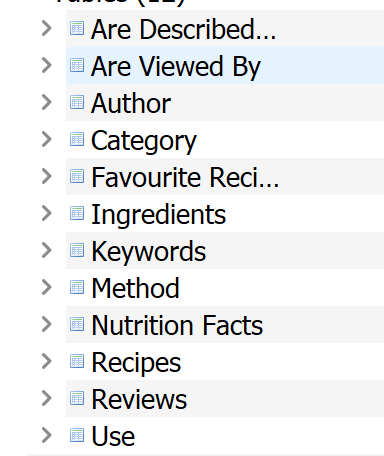

completed:

author
reviews
category
keywords
